In [1]:
import sys
import os

# Get the absolute path of the utils directory
utils_path = os.path.abspath("lib")
sys.path.append(utils_path)
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qiskit.qpy as qpy
import pickle
import json
import matplotlib.patches as mpatches
from numba import njit
from numba.typed import List
from plotting import *
from readings import *
from tile_process import *

In [9]:
N = 12; f_orbs = (3,3)
seam_lst = [6]
epsilon = 0.00001
prehead = "../data_H_12/"
ansatz, excitations,initial_state,hamiltonian = read_data_distance(1.5, epsilon,prehead)
print(excitations)
# excitations = orbital_reordering(excitations, f_orbs)
print(excitations)
print("reorder complete")
tiles = create_circuit_tile(excitations)
inter_tiles, intra_tiles = split_grid(tiles, seam_lst)
print("split_complete")
inter_packer = TilePacker(inter_tiles)
intra_packer = TilePacker(intra_tiles)
packer = TilePacker(tiles)
print("create complete")
print(len(tiles))
inter_width, inter_height, inter_placed_tiles, inter_grid = inter_packer.pack_tiles()
print(1)
intra_width, intra_height, intra_placed_tiles, intra_grid = intra_packer.pack_tiles()
print(2)
width, height, placed_tiles, grid = packer.pack_tiles()
print(f"Bounding box size: {width} x {height}")
print("Placed tiles:", placed_tiles)
intra_packer.draw_packing(intra_grid,seam_lst)
inter_packer.draw_packing(inter_grid,seam_lst)
packer.draw_packing(grid,seam_lst)

[[[1], [2]], [[13], [14]], [[0], [3]], [[12], [15]], [[5], [6]], [[17], [18]], [[4], [7]], [[16], [19]], [[9], [10]], [[21], [22]], [[8], [11]], [[20], [23]], [[14, 0], [0, 12]], [[2, 12], [0, 12]], [[14, 1], [0, 12]], [[2, 13], [0, 12]], [[15, 0], [0, 12]], [[3, 12], [0, 12]], [[15, 1], [0, 12]], [[3, 13], [0, 12]], [[15, 3], [0, 12]], [[2, 0], [0, 1]], [[14, 0], [0, 13]], [[2, 12], [12, 1]], [[14, 12], [12, 13]], [[2, 1], [0, 1]], [[2, 13], [0, 13]], [[14, 1], [12, 1]], [[14, 13], [12, 13]], [[3, 0], [0, 1]], [[15, 0], [0, 13]], [[3, 12], [12, 1]], [[15, 12], [12, 13]], [[3, 1], [0, 1]], [[3, 13], [0, 13]], [[15, 1], [12, 1]], [[15, 13], [12, 13]], [[14, 0], [1, 13]], [[2, 12], [1, 13]], [[14, 1], [1, 13]], [[2, 13], [1, 13]], [[14, 2], [1, 13]], [[15, 0], [1, 13]], [[3, 12], [1, 13]], [[15, 1], [1, 13]], [[3, 13], [1, 13]], [[16, 0], [1, 13]], [[4, 12], [1, 13]], [[2, 1], [0, 2]], [[14, 1], [0, 14]], [[2, 13], [12, 2]], [[14, 13], [12, 14]], [[14, 2], [0, 14]], [[14, 2], [12, 2]], [

KeyboardInterrupt: 

create complete
Bounding box size: 184 x 11
Placed tiles: [(0, [[8, 8, 0, 3]]), (8, [[8, 8, 0, 3]]), (16, [[8, 7, 0, 4]]), (24, [[8, 7, 0, 4]]), (32, [[8, 6, 0, 2]]), (40, [[8, 6, 0, 2]]), (48, [[8, 6, 0, 5]]), (56, [[8, 6, 0, 5]]), (64, [[8, 5, 0, 6]]), (72, [[8, 5, 0, 6]]), (80, [[8, 5, 0, 2]]), (88, [[8, 5, 0, 2]]), (64, [[8, 4, 0, 2]]), (72, [[8, 4, 0, 2]]), (80, [[8, 4, 0, 7]]), (88, [[8, 4, 0, 7]]), (48, [[8, 3, 0, 2]]), (56, [[8, 3, 0, 2]]), (96, [[8, 3, 0, 2]]), (104, [[8, 3, 0, 2]]), (112, [[6, 3, 0, 2]]), (118, [[6, 3, 0, 2]]), (32, [[6, 3, 0, 8]]), (38, [[6, 3, 0, 8]]), (124, [[6, 3, 0, 2]]), (130, [[6, 3, 0, 2]]), (96, [[6, 3, 0, 8]]), (102, [[6, 3, 0, 8]]), (136, [[6, 3, 0, 2]]), (142, [[6, 3, 0, 2]]), (108, [[6, 3, 0, 8]]), (114, [[6, 3, 0, 8]]), (148, [[6, 3, 0, 2]]), (154, [[6, 3, 0, 2]]), (160, [[6, 3, 0, 2]]), (166, [[6, 3, 0, 2]]), (120, [[6, 3, 0, 8]]), (126, [[6, 3, 0, 8]]), (172, [[6, 3, 0, 2]]), (178, [[6, 3, 0, 2]]), (132, [[6, 3, 0, 8]]), (138, [[6, 3, 0, 8]]),

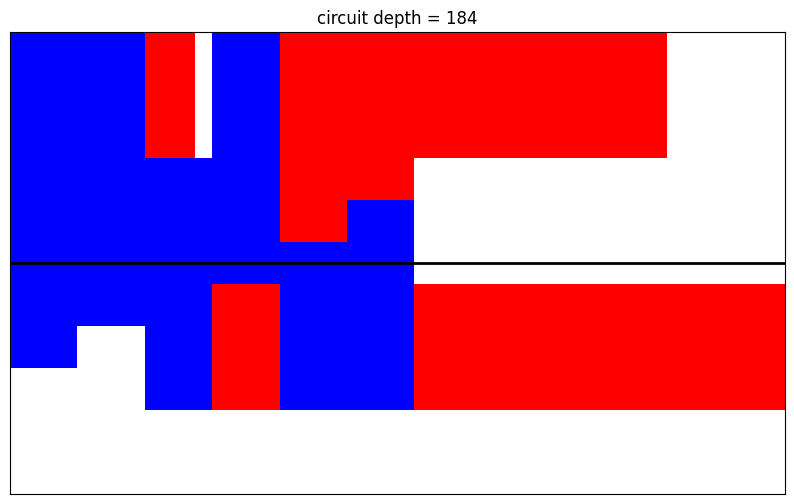

[]


In [4]:
N = 12; f_orbs = (3,3)
epsilon = 0.01
overlap_lst = []
seam_lst = [6]
ansatz, excitations,initial_state,hamiltonian = read_data_distance(epsilon, epsilon,prehead)
# excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
packer = TilePacker(tiles)
print("create complete")
width, height, placed_tiles, grid = packer.pack_tiles()
print(f"Bounding box size: {width} x {height}")
print("Placed tiles:", placed_tiles)
packer.draw_packing(grid,seam_lst)
print(overlap_lst)

In [5]:
N = 12
f_orbs = (3,3)
epsilon = 0
ansatz, excitations,initial_state,hamiltonian = read_data_distance(epsilon, epsilon,prehead)
excitations = to_numba_typed_list(excitations)
# excitations = orbital_reordering(excitations, f_orbs)
# excitations = np.array(excitations)
excitations = excitations
time_gate(excitations, N)
plt.title(f"epsilon = {epsilon}")
plt.show()

KeyboardInterrupt: 

In [ ]:
seam_lst = [8,16]
distance = 1.5
epsilon = 0.0001
ansatz, excitations,initial_state,hamiltonian = read_data_distance(distance, epsilon,prehead)
excitations = to_numba_typed_list(excitations)
f_orbs = (2,2,2,2,2,2)
excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
inter_tiles, intra_tiles = split_grid(tiles, seam_lst)
initial_packer = TilePacker(tiles)
ratio_lst = np.linspace(1, 20, 20)
initial_gate_lst = np.zeros(np.size(ratio_lst))
post_gate_lst = np.zeros(np.size(ratio_lst))
initial_gates, _, _, initial_grid = initial_packer.pack_tiles()
initial_time = initial_gates * 25
print("initialization complete")

# Parallel execution
print(seam_lst)
results = Parallel(n_jobs=-1, backend='threading')(delayed(tile_expanding)(
    k, ratio_lst, tiles, seam_lst, initial_time) for k in range(len(ratio_lst)))

# Unpack results
for k, (initial_time, post_time) in enumerate(results):
    initial_gate_lst[k] = initial_time
    post_gate_lst[k] = post_time


initialization complete
[8, 16]
Running job 0 on thread 25296
Running job 1 on thread 2520
Running job 2 on thread 21024
Running job 3 on thread 25324
Running job 4 on thread 22656
Running job 5 on thread 20088
Running job 6 on thread 27136
Running job 7 on thread 20584
Running job 8 on thread 9748
Running job 9 on thread 12160
Running job 10 on thread 26632
Running job 11 on thread 22156
Running job 12 on thread 20124
Running job 13 on thread 14168
Running job 14 on thread 20968
Running job 15 on thread 7296
END job 1 on thread 2520
Running job 16 on thread 2520
END job 0 on thread 25296
Running job 17 on thread 25296
END job 3 on thread 25324
Running job 18 on thread 25324
END job 2 on thread 21024
Running job 19 on thread 21024
END job 4 on thread 22656
END job 5 on thread 20088
END job 7 on thread 20584
END job 6 on thread 27136
END job 8 on thread 9748
END job 9 on thread 12160
END job 11 on thread 22156
END job 10 on thread 26632
END job 12 on thread 20124
END job 13 on thread 14

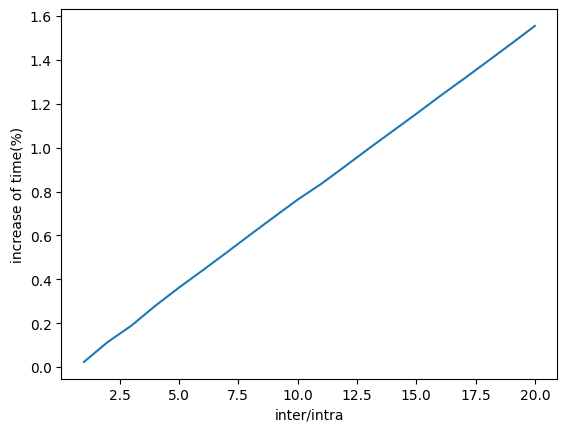

In [ ]:
post_gate_lst = np.array(post_gate_lst)
initial_gate_lst = np.array(initial_gate_lst)
diff = post_gate_lst - initial_gate_lst
plt.plot(ratio_lst, diff/initial_gate_lst[0])
plt.xlabel("inter/intra")
plt.ylabel("increase of time(%)")
post_gate_lst.tolist()
ratio_lst.tolist()
initial_gate_lst.tolist()
result = [ratio_lst, post_gate_lst, initial_gate_lst]
np.save(f"../H_12_transition/inter_transition_2_cut/epsilon = {epsilon}.npy", result)

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]


Text(0.5, 1.0, 'original algorithm')

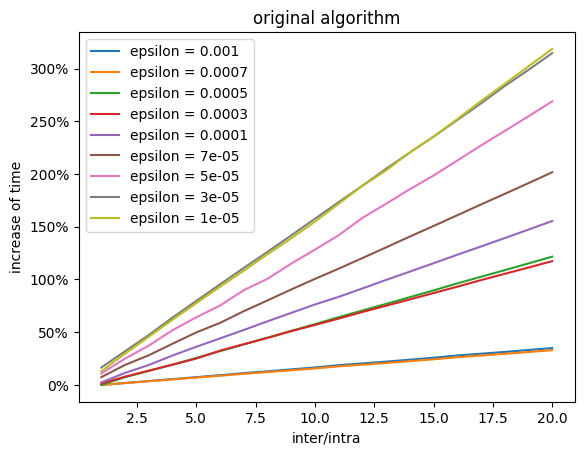

In [ ]:
from matplotlib.ticker import PercentFormatter
# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]

epsilon_lst = [0.001,0.0007, 0.0005, 0.0003,0.0001, 0.00007, 0.00005, 0.00003,1e-5]
for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_2_cut/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.plot(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("original algorithm")

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]
[225550. 257100. 288550. 320200. 352050. 383300. 414950. 450600. 484150.
 517850. 555450. 589650. 623400. 654750. 689300. 722800. 758850. 790550.
 824000. 859500.]
[224450. 257800. 289550. 321650. 352900. 383900. 414100. 445050. 475200.
 506550. 540350. 574150. 603250. 637050. 667350. 700050. 734100. 766450.
 799550. 832400.]


Text(0.5, 1.0, 'original algorithm')

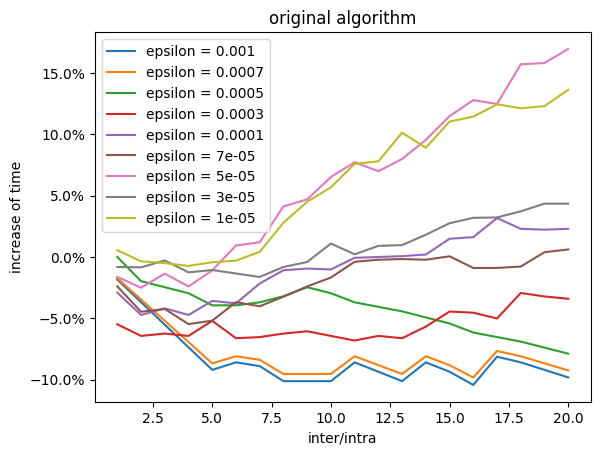

In [ ]:
from matplotlib.ticker import PercentFormatter
# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]
epsilon_lst = [0.001,0.0007, 0.0005, 0.0003,0.0001, 0.00007, 0.00005, 0.00003,1e-5]
for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_2_cut/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff1 = post_gate_lst1 - initial_gate_lst1

    result2 = np.load(f"../H_12_transition/inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy")
    ratio_lst2 = result2[0]
    post_gate_lst2 = result2[1]
    initial_gate_lst2 = result2[2]
    diff2 = post_gate_lst2 - initial_gate_lst2
    diff = post_gate_lst2 - post_gate_lst1
    plt.plot(ratio_lst1, diff/(initial_gate_lst1[0]), label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()
print(post_gate_lst2)
print(post_gate_lst1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("original algorithm")

In [ ]:
seam_lst = [8,16]
distance = 1.5
epsilon = 0.00001
ansatz, excitations,initial_state,hamiltonian = read_data_distance(distance, epsilon)
excitations = to_numba_typed_list(excitations)
f_orbs = (2,2,2,2,2,2)
excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
initial_packer = TilePacker(tiles)
ratio_lst = np.linspace(1, 20, 20)
initial_gate_lst = np.zeros(np.size(ratio_lst))
post_gate_lst = np.zeros(np.size(ratio_lst))
initial_gates, _, _, initial_grid = initial_packer.pack_tiles()
initial_time = initial_gates * 25
print("initialization complete")

print(seam_lst)
results = Parallel(n_jobs=-1, backend='threading')(delayed(process_ratio)(
    k, ratio_lst, tiles, seam_lst, initial_time, twocut=True) for k in range(len(ratio_lst)))

# Unpack results
for k, (initial_time, post_time) in enumerate(results):
    initial_gate_lst[k] = initial_time
    post_gate_lst[k] = post_time

initialization complete
[8, 16]
Processing seam 8 on thread 16040
Processing seam 8 on thread 14608
Processing seam 8 on thread 27148
Processing seam 8 on thread 3620
Processing seam 8 on thread 23104
Processing seam 8 on thread 22796
Processing seam 8 on thread 27940
Processing seam 8 on thread 3156
Processing seam 8 on thread 17144
Processing seam 8 on thread 3700
Processing seam 8 on thread 2376
Processing seam 8 on thread 18908
Processing seam 8 on thread 15540Processing seam 8 on thread 19060

Processing seam 8 on thread 2080
Processing seam 8 on thread 28156
END Processing seam 8 on thread 16040
Processing seam 8 on thread 16040
END Processing seam 8 on thread 14608
Processing seam 8 on thread 14608
END Processing seam 8 on thread 27148
Processing seam 8 on thread 27148
END Processing seam 8 on thread 3620
Processing seam 8 on thread 3620
END Processing seam 8 on thread 23104
END Processing seam 8 on thread 22796
END Processing seam 8 on thread 27940
END Processing seam 8 on thre

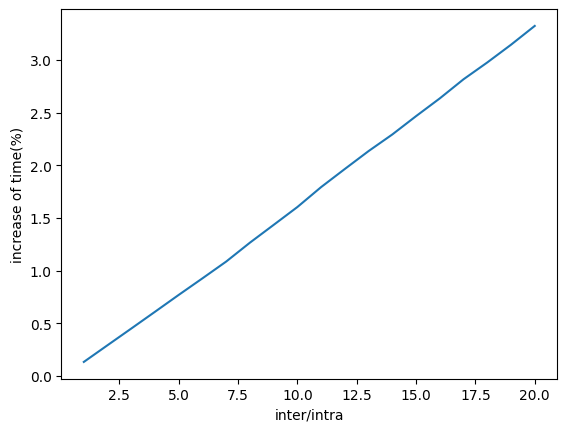

In [ ]:
post_gate_lst = np.array(post_gate_lst)
initial_gate_lst = np.array(initial_gate_lst)
diff = post_gate_lst - initial_gate_lst
plt.plot(ratio_lst, diff/initial_gate_lst[0])
plt.xlabel("inter/intra")
plt.ylabel("increase of time(%)")
post_gate_lst.tolist()
ratio_lst.tolist()
initial_gate_lst.tolist()
result = [ratio_lst, post_gate_lst, initial_gate_lst]
np.save(f"inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy", result)

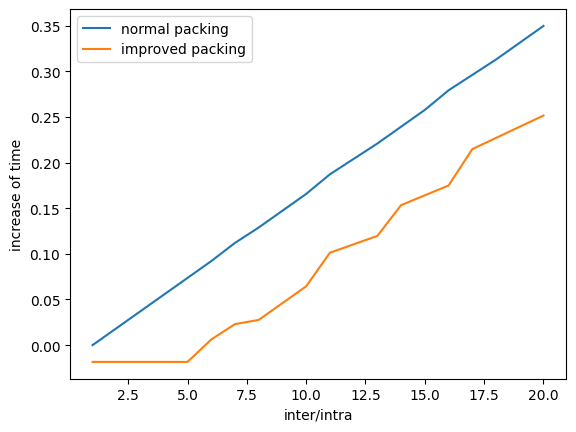

In [ ]:
epsilon = 0.001
filename_lst = [f"inter_transition_2_cut/epsilon = {epsilon}.npy", f"inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy"]
for filename in filename_lst:
    result = np.load(filename)
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.plot(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")

plt.legend(["normal packing", "improved packing"])

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]


Text(0.5, 1.0, 'improved algorithm')

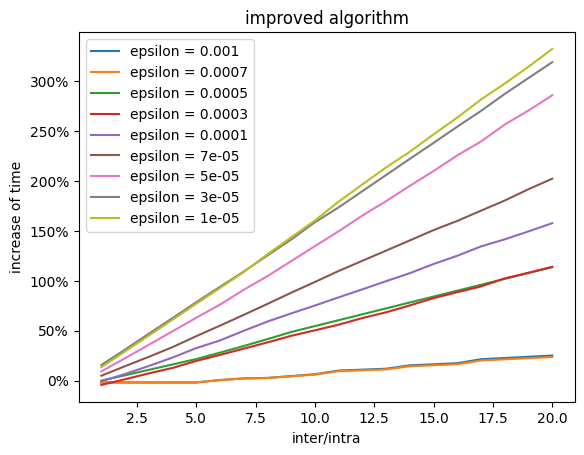

In [ ]:
from matplotlib.ticker import PercentFormatter
# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]
epsilon_lst = [0.001,0.0007,0.0005,0.0003 ,0.0001, 0.00007, 0.00005, 0.00003, 0.00001]
for epsilon in epsilon_lst:
    result = np.load(f"inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.plot(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
plt.title("improved algorithm")

[0.1 1.1 2.1 3.1 4.1 5.1 6.1 7.1 8.1 9.1]


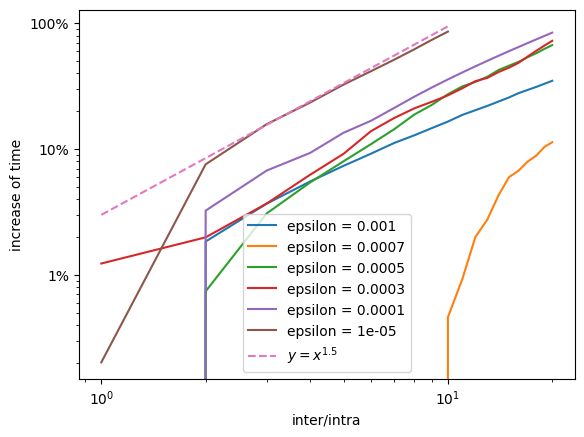

In [ ]:
from matplotlib.ticker import PercentFormatter
epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]
for epsilon in epsilon_lst:
    result = np.load(f"inter_transition_1_cut/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.loglog(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.loglog(ratio_lst1, ratio_lst1**1.5*0.03, "--", label = r"$y=x^{1.5}$")
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 